In [16]:
import sys
import os
import csv
import numpy as np
from glob import glob
import matplotlib.pylab as plt
%matplotlib inline

In [54]:
def csv_loader(path):
    with open(path, 'r') as f:
        reader = csv.reader(f)
        vec = [row for row in reader]
        vec_title = vec[0]
        vec.pop(0)
        vec = np.array(vec).transpose(1,0).astype(np.float32)
    return vec, vec_title

def normalization(vec):
    vec = np.array(vec)
    vec_norm = np.array([(v - np.mean(v)) / (np.std(v) + 0.00000001) for v in vec]).astype(np.float32)
    return vec_norm

In [55]:
split_list = glob('/Users/tokkuman/git-tokkuman/embryo_classification/datasets/input/E0*')
dist = '/Users/tokkuman/git-tokkuman/embryo_classification/datasets/input_norm/'
os.makedirs(dist, exist_ok=True)
# vec = []
# for s in split_list:
#     vec.append(csv_loader(os.path.join(s, 'criteria.csv')))

In [56]:
for s in split_list:
    os.makedirs(os.path.join(dist, os.path.basename(s)), exist_ok=True)
    vec, vec_title = csv_loader(os.path.join(s, 'criteria.csv'))
    vec_ave = []
    for i in range(len(vec)):
        tmp = []
        for t in range(0, len(vec[i]), window):
            tmp.append(np.mean(vec[i][t:t+window]))
        vec_ave.append(tmp)
    vec_ave = np.array(vec_ave).transpose(1, 0)
    with open(os.path.join(dist, os.path.basename(s), 'criteria.csv'), 'w') as f:
        c = csv.writer(f)
        c.writerow(vec_title)
        for t in range(len(vec_ave)):
            c.writerow(vec_ave[t])
            
print(vec_ave)

[[3.0000000e+00 2.0000000e+00 7.1687998e+03 ... 3.3438761e-02
  9.2311001e-01 4.1531529e-03]
 [8.0000000e+00 2.0000000e+00 7.2578999e+03 ... 2.6714941e-02
  9.2059088e-01 6.6613695e-03]
 [1.3000000e+01 2.0000000e+00 7.0436001e+03 ... 3.5716832e-02
  9.0967894e-01 1.2539946e-02]
 ...
 [4.8300000e+02 5.4200001e+01 2.0045131e+03 ... 1.3599327e-01
  8.3948219e-01 7.7429987e-02]
 [4.8800000e+02 5.4799999e+01 2.0072018e+03 ... 1.5956791e-01
  8.4188843e-01 7.3959365e-02]
 [4.9200000e+02 5.4666668e+01 2.0026396e+03 ... 2.0589358e-01
  8.3706570e-01 7.4284561e-02]]


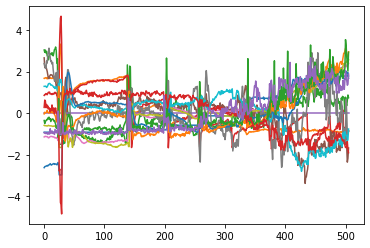

In [45]:
plt.figure()
vec_norm = normalization(vec[0])
for i in range(len(vec_norm)):
    plt.plot(vec_norm[i])

(15, 102)


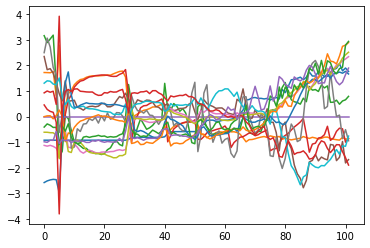

In [48]:
window = 5
vec_ave = []
for i in range(len(vec[0])):
    tmp = []
    for t in range(0, len(vec[0][0]), window):
        tmp.append(np.mean(vec[0][i][t:t+window]))
    vec_ave.append(tmp)
print(np.shape(vec_ave))
plt.figure()
vec_norm = normalization(vec_ave)
for i in range(len(vec_norm)):
    plt.plot(vec_norm[i])